# A origem dos Jogadores ⚽

## 1. Introdução

### 1.1 Motivação do Trabalho

Para conhecimento prévio, o projeto, “A Origem dos Jogadores”, tem como inspiração nominal, o livro do Biólogo, Naturalista e Geólogo, Charles Darwin, “A Origem das Espécies”. A análise feita por Darwin foi: animais da mesma espécie podem ramificar em subespécies a partir do contexto geológico e alimentar de uma região? Charles, em quinhentas páginas, explica esse fenômeno e o intitula como: seleção natural. Diante disso, o grupo composto por: José Hermano; Júlia Moraes; Luiz Eduardo e Tiago Petrucci, decidiu nomear o projeto como, “A Origem dos Jogadores”, pois, os jogadores serão analisados em um escopo geral: em todas as posições jogadas; por setores, defensivo, meio-campista e atacante; e em casos individuais específicos, assim também como Darwin fez, em certa maneira, com os estudos oriundos do Arquipélago de Colón e de outras partes do Mundo.

### 1.2 Objetivos de Análise

Nosso grupo tem como objetivos de análise, responder as seguintes perguntas. Qual é o comportamento das posições antagônicas, ou seja, como as características específicas dos jogadores como, por exemplo, goleiros e atacantes, que “teoricamente” são funções opostas dentro do campo. Um visa defender o gol, enquanto, o outro busca fazê-lo. Como se comportam estatisticamente? Pode enquadrar também os: pontas e laterais, e zagueiros e meias. Quais ou qual é a característica mais importante para um jogador possuir por setor? Quais são, estatisticamente, os melhores jogadores por posição, e também, por característica específica, ou seja, qual é o melhor driblador, baseado completamente em dados? Essas e outras perguntas podem ser respondidas com os dados coletados no projeto.

## 2. Sobre o Dataset

### 2.1 Descrição do Dataset

O Dataset contém os dados dos jogadores, treinadores e times, tanto feminino quanto masculino, do FIFA 15 ao 24. Por uma questão de análise decidimos trabalhar apenas com o arquivo dos jogadores masculinos, devido a sua grande riqueza de informações e número de jogadores.

### 2.2 Exploração Inicial dos Dados

*Importando as Bibliotecas necessárias para trabalhar com o dataset*

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans

#Importando as funções criadas por nós
import funcoes as fun

Importando o dataset 

In [6]:
data = pd.read_csv('archive/male_players.csv',low_memory=False)

## 3. Pré-processamento do Dataset

### 3.1 Limpeza e tranformação dos dados

#### 3.1.1 Limpeza dos dados

In [7]:
# Verificando se existe valores nulos
display(data.isnull().sum())
display(data.info())

player_id       0
player_url      0
fifa_version    0
fifa_update     0
update_as_of    0
               ..
lcb             0
cb              0
rcb             0
rb              0
gk              0
Length: 109, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Columns: 109 entries, player_id to gk
dtypes: float64(20), int64(43), object(46)
memory usage: 149.7+ MB


None

Não existem valores nulos no nosso dataset. Então não se faz necessária a limpeza nesse aspecto.

#### 3.1.2 Divindo o Dataset por categoria

Fazendo a divisão do Dataset por categorias, selecionando as habilidades mais relevantes por setor.

**Categoria Defensiva**

A categoria defensiva engloba os jogares responsáveis por defender e recuperar a posse da bola. Ela busca, portanto diminuir a amplitude da equipe adversária.

Essa categoria engloba os goleiros, os zagueiros, os laterais e os alas defensivos. 

Para os laterais a velocidade foi considerada como atributo principal, tendo em consideração a necessidade deles em acompanhar os adversários. 

Para os zagueiros foi eleito a noção defensiva, levanndo em consideração sua responsabilidade de proteger a área, impedindo o avanço dos adversários.

Já nos goleiro os reflexos foram atribuídos como habilidade de maior impacto no desempenho.

In [8]:
#Filtrando para que o dataset pegue todas as colunas que contenham ao menos uma dessas posições
busca = "GK|CB|LB|RB|LWB|RWB"

defense_players = data[data["player_positions"].str.contains(busca)]

In [9]:
#Filtrando as categorias importantes
defense_players = defense_players[["fifa_version", "player_positions", "short_name",
                                   "movement_sprint_speed","defending_marking_awareness","goalkeeping_reflexes","overall" ]]

defense_players

,fifa_version,player_positions,short_name,movement_sprint_speed,defending_marking_awareness,goalkeeping_reflexes,overall
6,24.0,GK,T. Courtois,52,20,93,90
9,24.0,GK,Alisson,49,15,89,89
11,24.0,CB,Rúben Dias,69,91,12,89
13,24.0,GK,M. ter Stegen,50,25,91,89
15,24.0,CB,V. van Dijk,87,90,11,89
...,...,...,...,...,...,...,...
180013,15.0,GK,L. Pilling,41,25,45,42
180015,15.0,GK,S. Ramsbottom,40,25,44,42
180016,15.0,CB,E. Redman,66,38,6,41
180018,15.0,"LM, LB",P. Żemło,58,54,9,40


**Categoria de Meio-Campo**

A categoria Meio-Campo engloba os jogares responsáveis pelo jogo rodar.
São parte dela os meia-centrais, os volantes, os meia-abertas e os meia-atacantes.

Para os volantes, meia-centrais e meia-atacantes o passe curto é o atributo mais importante, já que eles são os maiores responsáveis por distribuir os passes. 


Para os meias-abertos, o drible foi considerado um fator de destaque, pois, assim como os pontas, eles frequentemente realizam jogadas individuais

In [10]:
busca = "CDM|LM|RM|CM|CAM"

midfield_players = data[data["player_positions"].str.contains(busca)]

In [11]:

midfield_players = midfield_players[["fifa_version", "player_positions", "short_name",
                                   "attacking_short_passing","dribbling","overall"]]

midfield_players

,fifa_version,player_positions,short_name,attacking_short_passing,dribbling,overall
2,24.0,"CM, CAM",K. De Bruyne,94,87.0,91
3,24.0,"CF, CAM",L. Messi,91,94.0,90
10,24.0,"CDM, CM",Rodri,89,80.0,89
14,24.0,CDM,Casemiro,84,73.0,89
17,24.0,"CM, RW",F. Valverde,87,84.0,88
...,...,...,...,...,...,...
180009,15.0,"LM, ST",L. Davies,37,46.0,43
180012,15.0,"CM, CDM, RM",M. Palmer,44,38.0,42
180014,15.0,CM,M. Maier,47,45.0,42
180018,15.0,"LM, LB",P. Żemło,40,31.0,40


**Categoria Ataque**

A categoria Ataque engloba os jogadores encarregados de finalizar as jogadas. Sendo eles os pontas, centroavantes e segundo-atacantes.

Para os pontas, o drible é a característica de destaque pois, assim como os meia-abertos, eles praticam mais jogadas individuais. Tendo a diferença de que os pontas se destacam pelo drible, jogando principalmente nas laterais para cruzamentos, enquanto os meias-abertos tendem a operar centralmente, participando mais da construção das jogadas.

Para os centroavantes e segundo-atacantes a finalização é o principal, já que eles têm como papel principal finalizar as jogadas, ou seja, fazer o gol.

In [12]:
busca = "LW|ST|RW|CF"

attack_players = data[data["player_positions"].str.contains(busca)]

In [13]:

attack_players = attack_players[["fifa_version", "player_positions", "short_name",
                                   "attacking_finishing","dribbling", "overall"]]

attack_players

,fifa_version,player_positions,short_name,attacking_finishing,dribbling,overall
0,24.0,"ST, LW",K. Mbappé,94,92.0,91
1,24.0,ST,E. Haaland,96,80.0,91
3,24.0,"CF, CAM",L. Messi,89,94.0,90
4,24.0,"CF, ST",K. Benzema,91,87.0,90
5,24.0,ST,R. Lewandowski,93,87.0,90
...,...,...,...,...,...,...
179967,15.0,ST,S. Austin,48,48.0,46
179989,15.0,"ST, RW",J. Allen,45,47.0,45
179996,15.0,ST,A. Peterson,29,53.0,45
180009,15.0,"LM, ST",L. Davies,50,46.0,43


## 4. Desenvolvimento

### 4.1 Boxplt das Posições Por Habilidade ao longo dos anos

#### 4.1.1 Categoria Defensiva

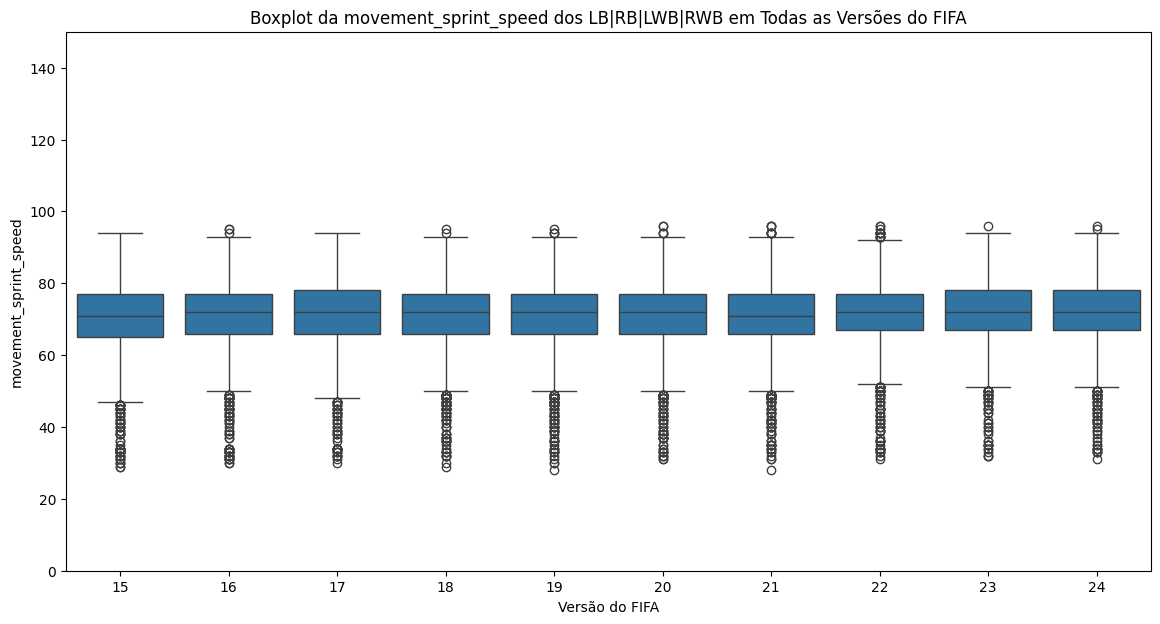

In [12]:

fun.BoxAttribbutes(defense_players, "LB|RB|LWB|RWB", "movement_sprint_speed")


A mediana não teve grandes variações ao decorrer dos anos. No aspecto de outliers dos jogadores laterais em relação as suas velocidades, podemos observar que existem mais jogadores abaixo do limite inferior do que do limite superior. Com isso podemos concluir que laterais muito rápidos são mais raros que laterais muito lentos.

Levando em consideração uma análise geral, podemos afirmar que os laterais obtiveram o pior resultado relação aos outliers devido a grande diferença entre outliers positivos e negativos.

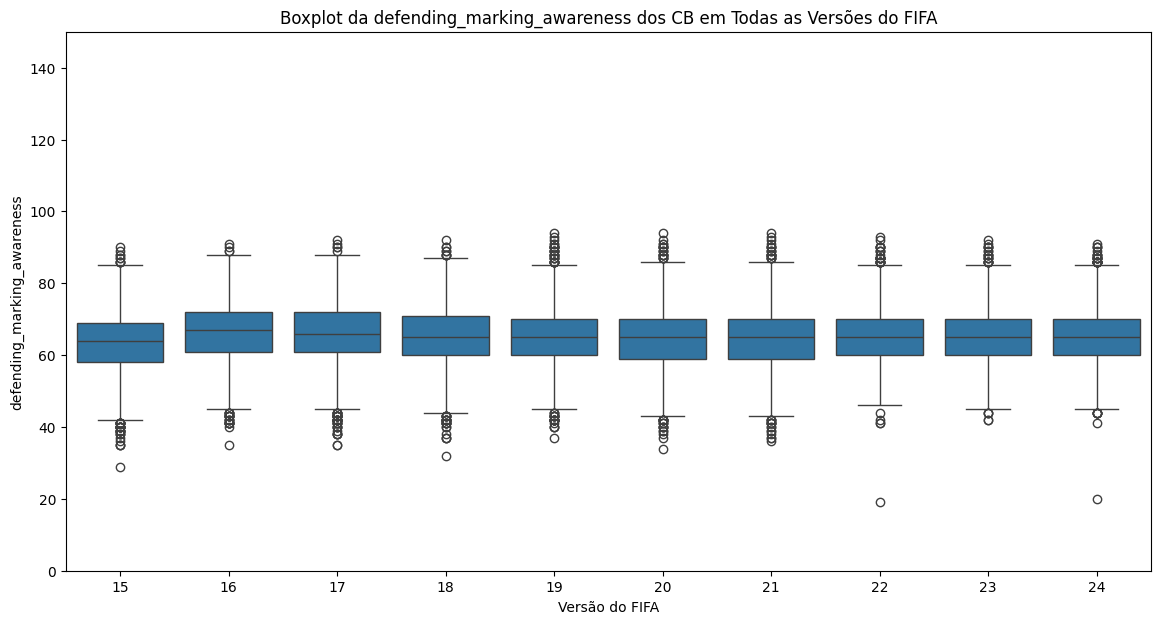

In [13]:
fun.BoxAttribbutes(defense_players,"CB", "defending_marking_awareness")

Novamente, podemos ver que não houve variações nas medianas, sendo as maiores do FIFA 16 e 17. 

Podemos ver que do FIFA 15 ao 18 os outlier são concentrados no limite inferior enquanto, a partir do FIFA 19 houve o crescimento de jogadores acima do limite superior. Mas, uma análise que cabe a todos os FIFAS é quanto melhor os zagueiros melhor sua noção defensiva.

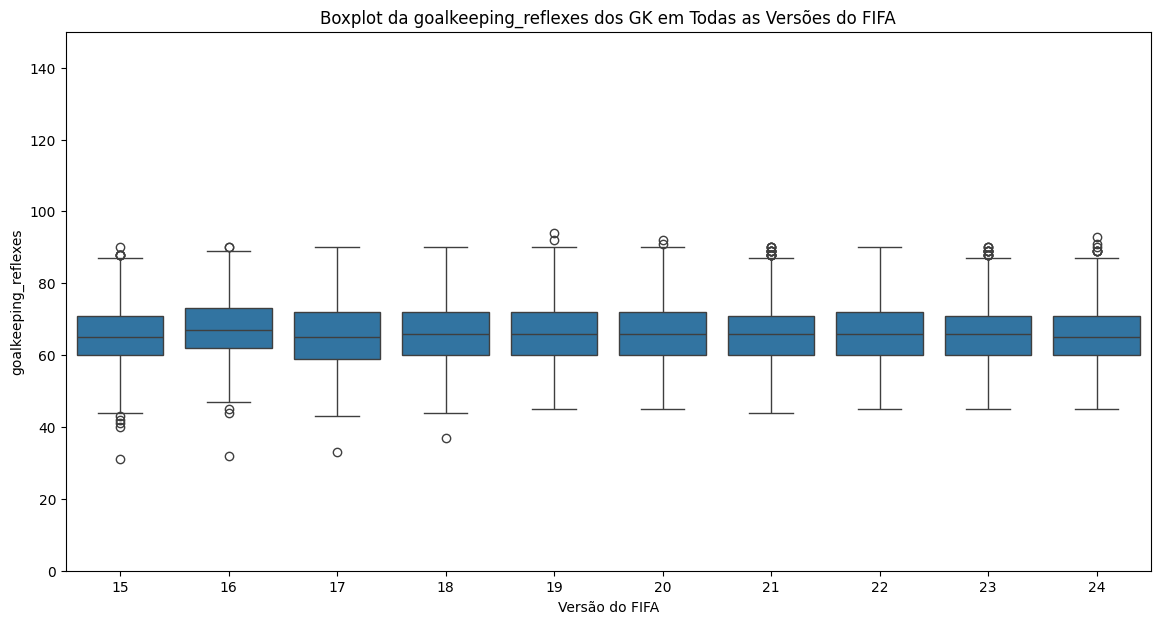

In [14]:
fun.BoxAttribbutes(defense_players,"GK", "goalkeeping_reflexes")

Tendo em vista esse gráfico, pode-se afirmar que os goleiros são mais constantes que as outras posições, por estarem em sua maioria no intervalo dos limites.

#### 4.1.2 Categoria Meio-Campo

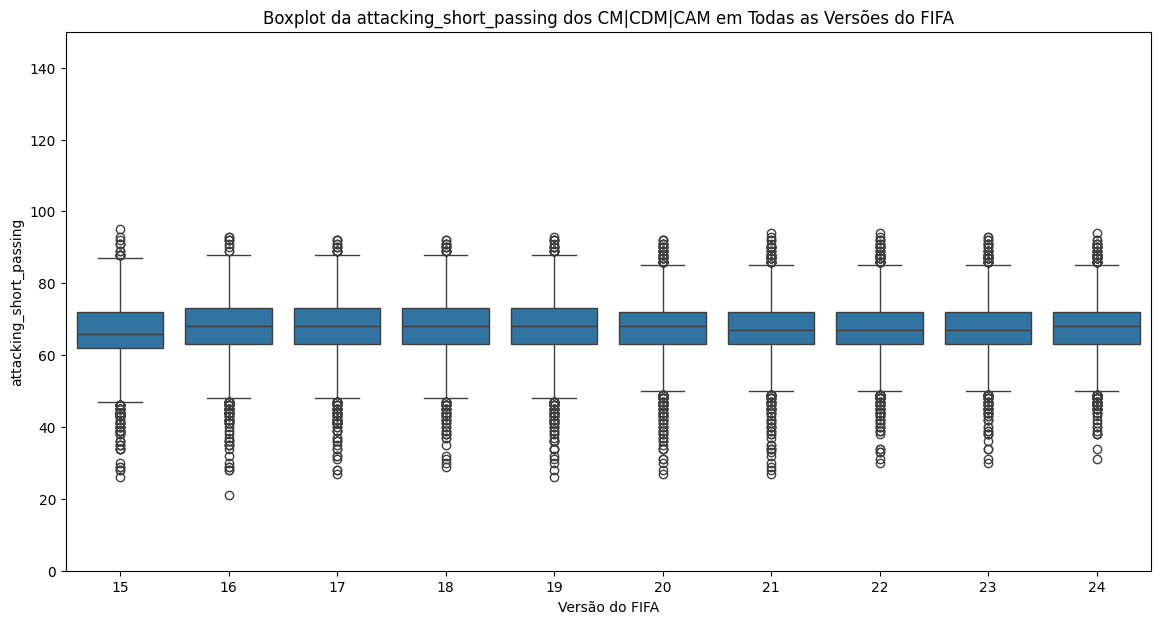

In [15]:
fun.BoxAttribbutes(midfield_players,"CM|CDM|CAM","attacking_short_passing")

O intervalo interquartil dessa categoria foi o menor até então, vemos novamente uma maior concentração no limite inferior. 

Trazendo uma visão técnica, isso se dá porque o passe é considerada uma das habilidades mais difíceis de um jogador refinar, pois além da dificuldade de realizar o passe em si, os jogadores também têm que desenvolver a habilidade de observar o seu entorno e os espaços dados pelo time adversário, além da movimentação do seu próprio time.

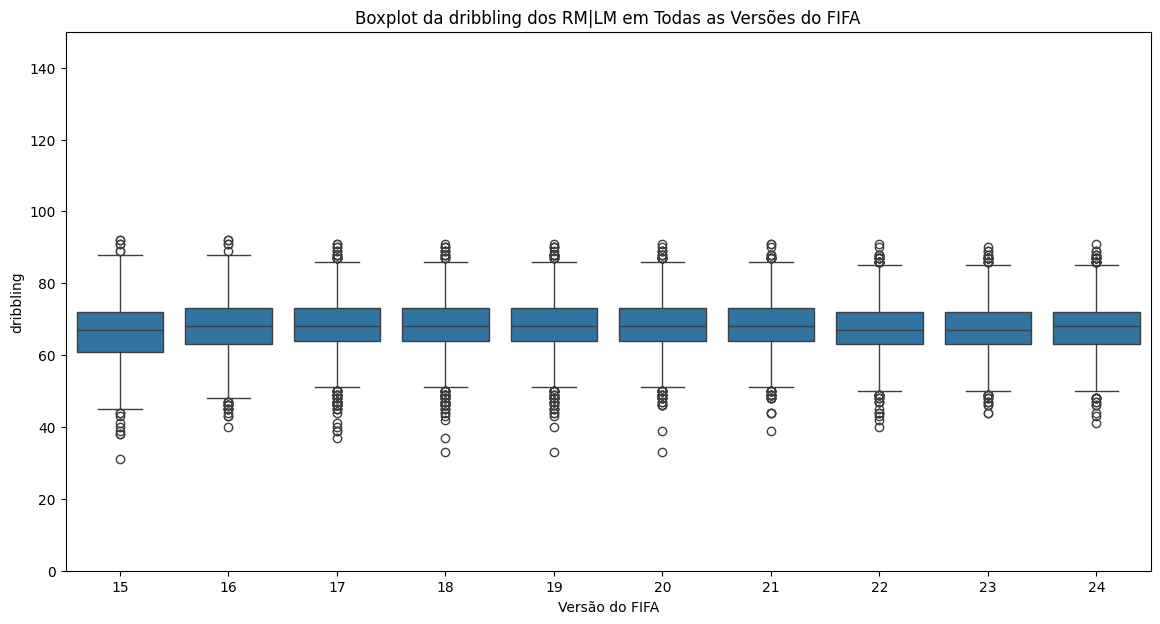

In [16]:
fun.BoxAttribbutes(midfield_players, "RM|LM","dribbling")

Assim como o passe, o drible também é uma habilidade muito única de cada jogador, o que a torna díficil do jogador evoluí-la porque também depende de fatores externos.

#### 4.1.3 Categoria Ataque

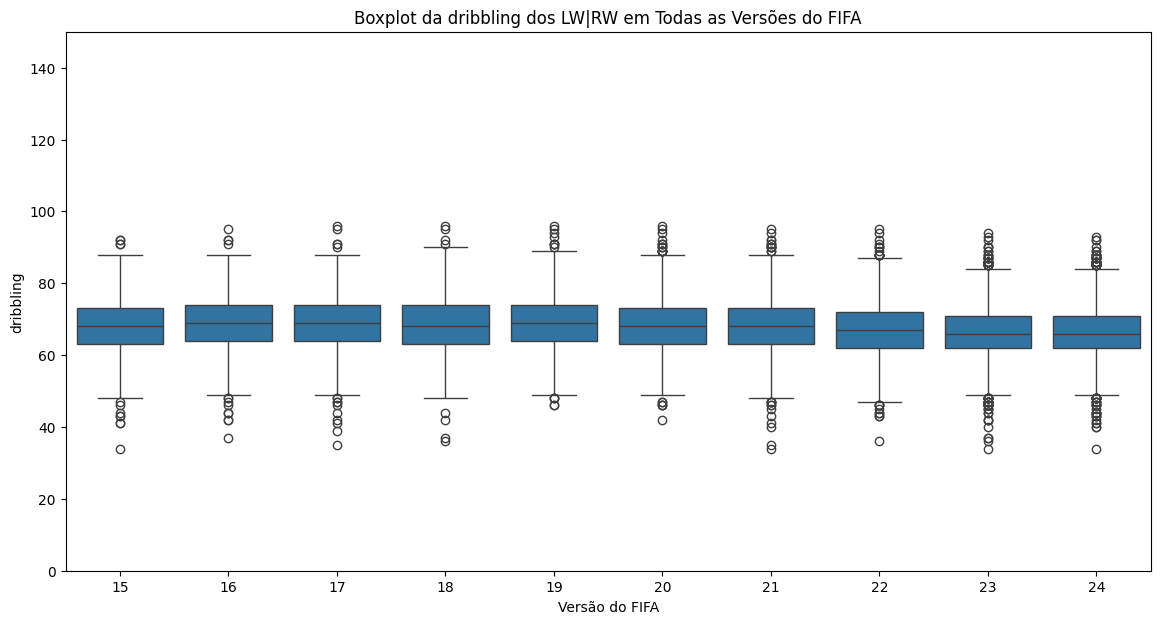

In [17]:
fun.BoxAttribbutes(attack_players,"LW|RW","dribbling")

Comparando com os LM e RM, observamos uma maior constância positiva nos pontas. Isso pode ocorrer devido ao fato de que geralmente os meias-abertos podem ter mais responsabilidades defensivas que os pontas, o que dá aos pontas mais liberdade para as jogadas individuais.

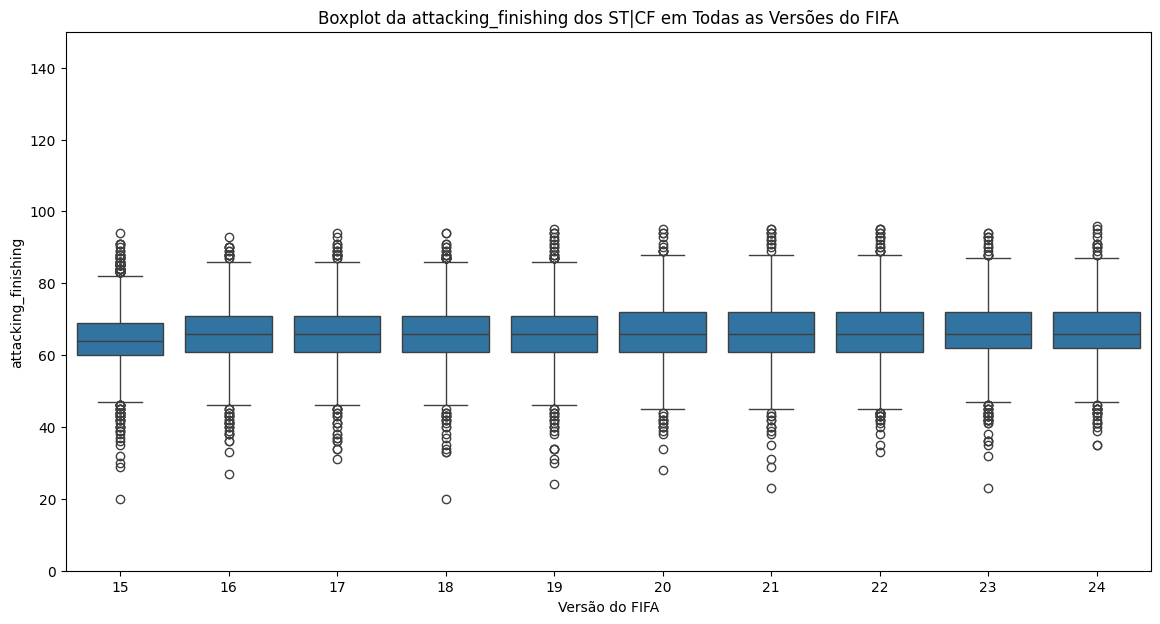

In [18]:
fun.BoxAttribbutes(attack_players,"ST|CF","attacking_finishing")

Olhando esse boxplot vemos uma quantia similar de outliers tanto positivos quanto negativos. Como o passe e o drible, essa também uma habilidade que poucos jogadores conseguem elevar a nível mundial, pelo fator de envolver um misto de noções que um jogador deve possuir para se colocar na melhor posição para finalizar a jogada. 

### 4.2 Qual setor possui a maior média de overall ?

Comparando a média entre os setores, visando descobrir qual setor tem os jogadores com maiores overall.

In [16]:
# Pegando a médoa de overall por setor
media_defensores = np.mean(defense_players["overall"])
media_meias = np.mean(midfield_players["overall"])
media_atacantes = np.mean(attack_players["overall"])


setores = ['Defesa','Meio-Campo','Atacantes']
media_setor = [media_defensores,media_meias,media_atacantes]

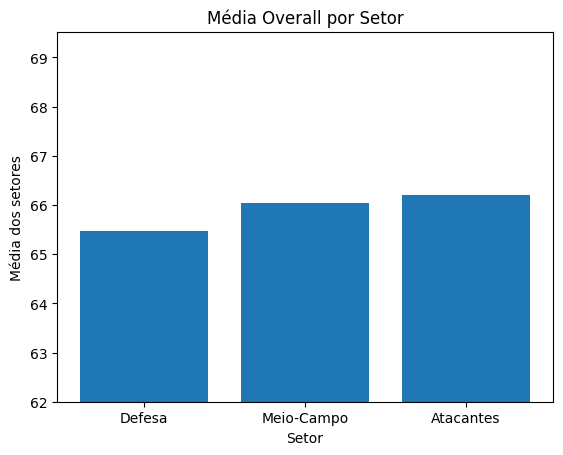

In [20]:
plt.bar(setores,media_setor)
plt.title('Média Overall por Setor')
plt.xlabel('Setor')
plt.ylabel('Média dos setores')

#Facilitar a visualição das diferenças de níveis entre eles
plt.ylim(62,None)
plt.show()

Analisando esse gráfico, podemos observar que o setor de ataque possui a maior média de overall. 

Historicamente a franquia do FIFA tende a dar um overall maior aos atacantes. Por exemplo no 24, que é o FIFA mais atual, temos seis atacantes com 90 mais de overall, enquanto no setor defensivo o overall máximo é 89, embora na vida real os TOP zagueiros mundiais consigam enfrentar os TOP atacante de igual para igual. 

### 4.3 Constância entre os setores

In [ ]:

defensores = []
meias = []
atacantes = []

# Lista para armazenar as médias por ano e setor
media_por_ano_setor = []

for i in range(15, 25):
    defensores_i = defense_players[(defense_players["overall"] > 0) & (defense_players["fifa_version"] == i)]
    meias_i = midfield_players[(midfield_players["overall"] > 0) & (midfield_players["fifa_version"] == i)]
    atacantes_i = attack_players[(attack_players["overall"] > 0) & (attack_players["fifa_version"] == i)]

    # Calcula as médias para cada setor e ano
    media_defensores_i = defensores_i["overall"].mean()
    media_meias_i = meias_i["overall"].mean()
    media_atacantes_i = atacantes_i["overall"].mean()

    # Armazena as médias 
    media_por_ano_setor.append({"fifa_version": i, "media": media_defensores_i, "setor": "Defensores"})
    media_por_ano_setor.append({"fifa_version": i, "media": media_meias_i, "setor": "Meias"})
    media_por_ano_setor.append({"fifa_version": i, "media": media_atacantes_i, "setor": "Atacantes"})

# Cria o DataFrame com as médias por ano e setor
media_df = pd.DataFrame(media_por_ano_setor)
media_df

Agora que temos as medias por ano, vamos elaborar o gráfico.

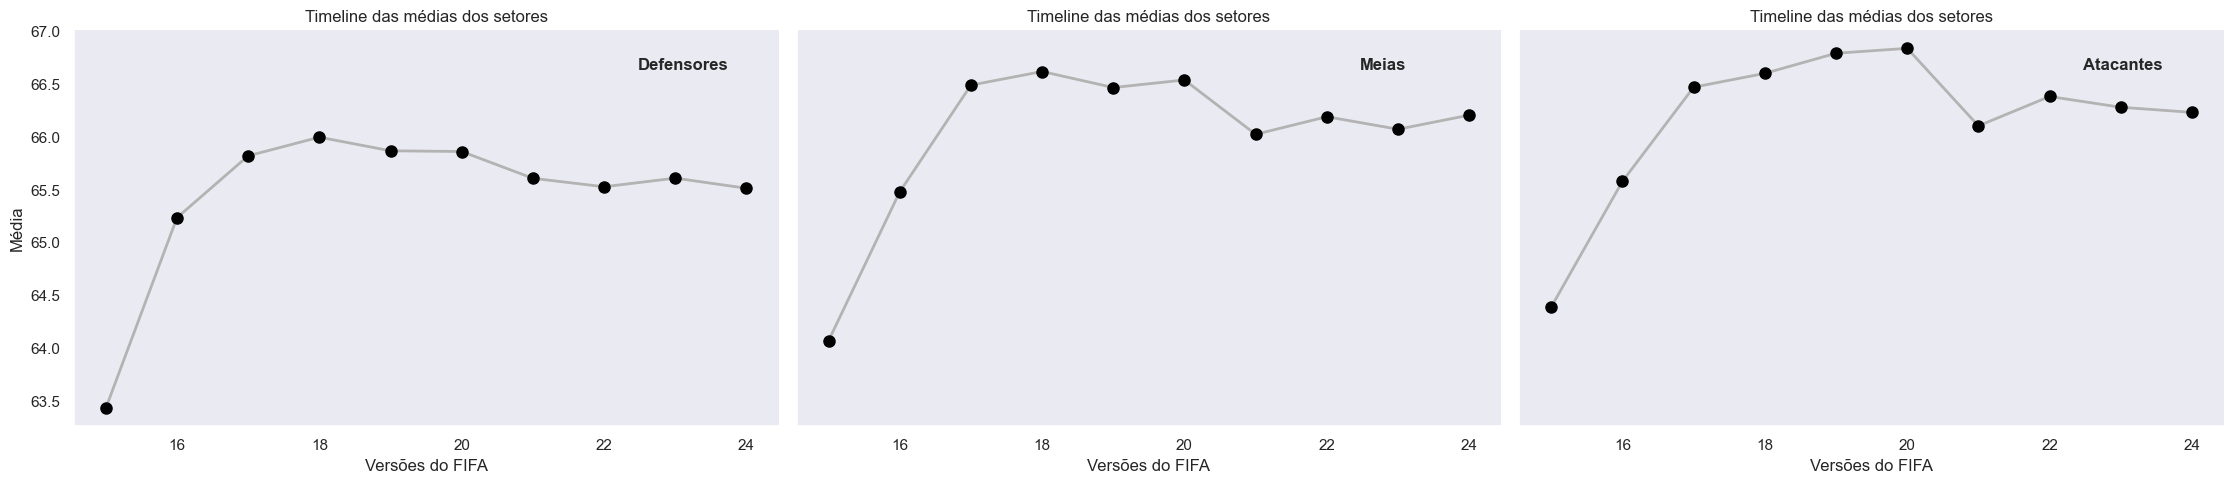

In [74]:


sns.set_theme(style="dark")

# Cria o plot com várias subparcelas (uma para cada setor)
g = sns.relplot(
    data=media_df,
    x="fifa_version", y="media", col="setor", hue="fifa_version",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=5, aspect=1.5, legend=False,
)

# Itera sobre cada subparcela
for setor, ax in g.axes_dict.items():
    # Adiciona o título como uma anotação na subparcela
    ax.text(.8, .9, setor, transform=ax.transAxes, fontweight="bold")
    
    # Plota a média do setor por versão do FIFA
    sns.lineplot(
        data=media_df[media_df["setor"] == setor], x="fifa_version", y="media",
        estimator="mean", color=".7", linewidth=2, ax=ax,
    )

    # Adiciona uma linha para cada valor correspondendo aos anos e suas médias
    for _, row in media_df[media_df["setor"] == setor].iterrows():
        ax.plot(row["fifa_version"], row["media"], marker="o", markersize=8, color="black")
        
    


g.set_titles("Timeline das médias dos setores")
g.set_axis_labels("Versões do FIFA", "Média")
g.tight_layout()

# Exibe o plot
plt.show()

Com esse gráfico sobre a constância da média ao longo dos anos, podemos observar o padrão de comportamento dos setores. O setor dos defensores, apesar de ter os menores valores, foi o que variou menos. O dos meias em comparação ao dos atacantes, variou menos. O dos atacantes, apesar de sempre se manter no topo, variou mais que os outros. Então concluimos que o setor dos defensores foi o que menos variou.

### 4.4 A partir da média é possível afirmar qual a posição com os melhores jogadores durante os anos?

Visando responder essa pergunta, pegamos todas as posições e suas características principais e fizemos uma média de cada uma delas. Ou seja, atacantes com finalização; defesa com a marcação; goleiros com reflexos e etc. E sabendo a maior média por ano, podemos deduzir qual é a característca e estilo de jogador mais requisitado naquele ano.

#### 4.4.1. Centroavantes 

In [21]:
#Chamando a função para pegar os melhores 500 atributos por ano 
attack_finishing_df = fun.ComparePlayers("ST", attack_players, "attacking_finishing")

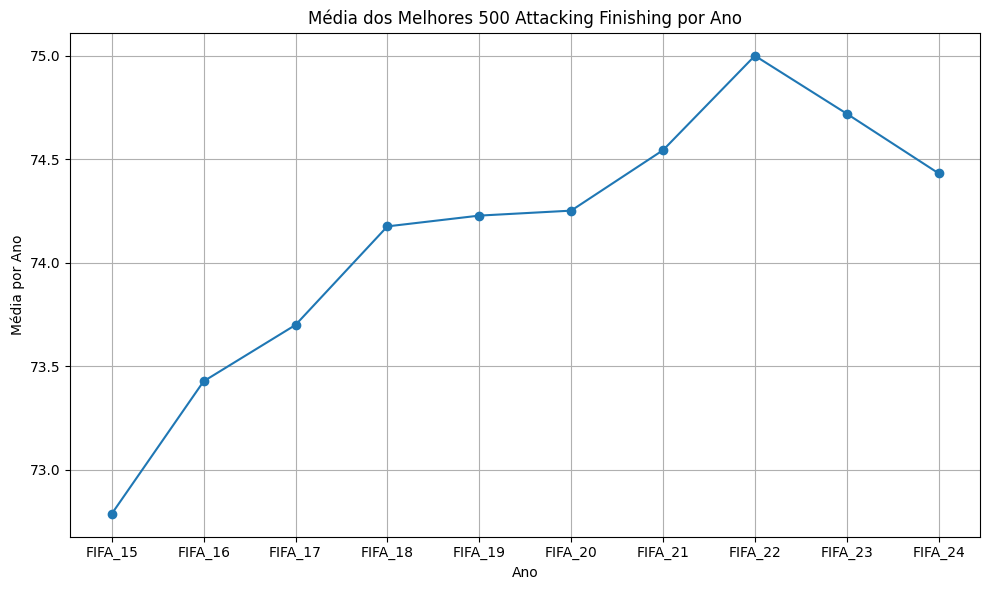

In [22]:
#Gráfico com mostrando a evolução durante os anos 
fun.PlotLineGraph(attack_finishing_df, "Attacking Finishing")


A partir do gráfico, podemos ver que a média dos atacantes ao passar dos anos é regular, pois o desvio padrão da característica é muito pequeno, ou seja, é uma posição que é requisitada mas mantém-se na média de atuação em campo. Observamos esse comportamente no boxplot.

#### 4.4.2. Goleiros

In [23]:
goal_reflexes_df = fun.ComparePlayers("GK", defense_players, "goalkeeping_reflexes")

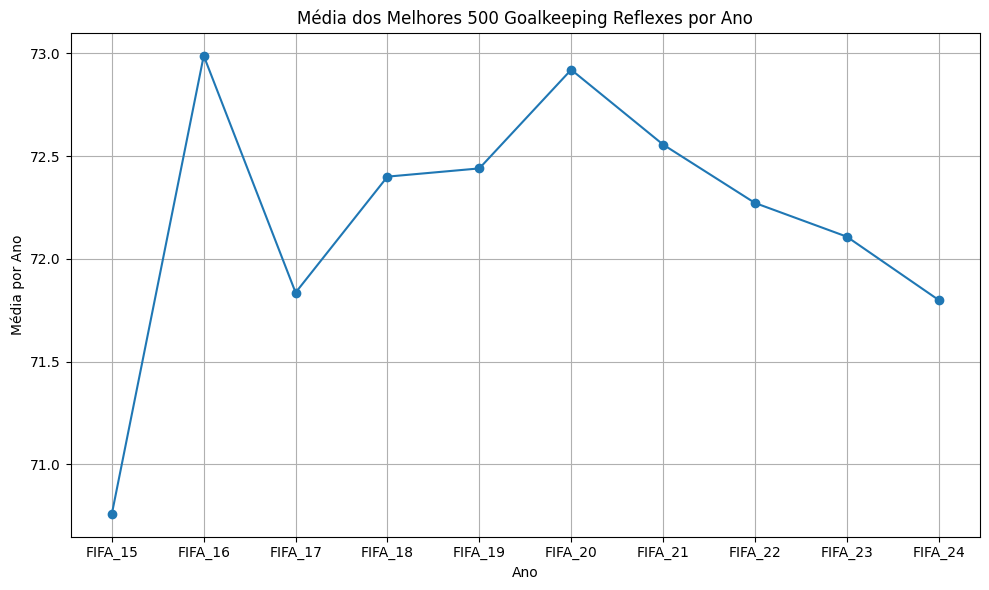

In [24]:
fun.PlotLineGraph(goal_reflexes_df, "Goalkeeping Reflexes")

Podemos ver que houve um aumento drástico, porém curto, do FIFA 15 ao 16. Porém após os anos estabilizou-se. Sabemos que o goleiro é uma das posições principais, e por isso possui uma média tão concisa.

#### 4.4.3. Zagueiro

In [25]:
nocao_defensiva_df = fun.ComparePlayers("CB", defense_players, "defending_marking_awareness")

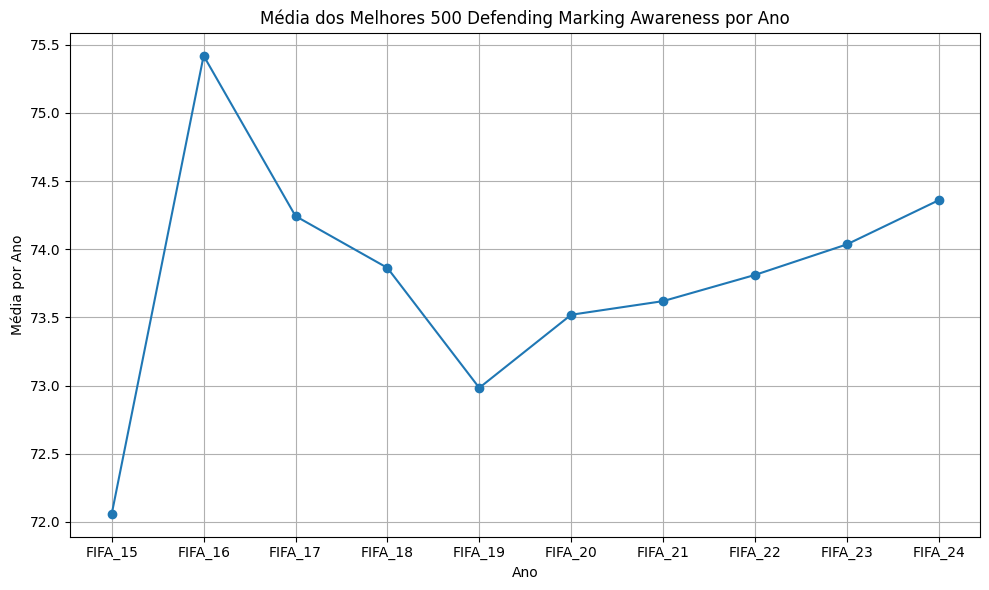

In [26]:
fun.PlotLineGraph(nocao_defensiva_df,"Defending Marking Awareness")

A posição do zagueiro,como podemos ver nesse gráfico, possui uma variação de média maior, por ser uma posição muito volátil. Alguns anos, a posição muda de foco, passando de marcação individual para compreensão do espaço de defesa. A diminuição de médoa do FIFA 16 ao 19, ocorreu por uma necessidade maior de compreensão de espaço de defesa a marcação individual.

#### 4.4.4. Meias 

In [27]:
passe_meias_df = fun.ComparePlayers("CM", midfield_players, "attacking_short_passing")

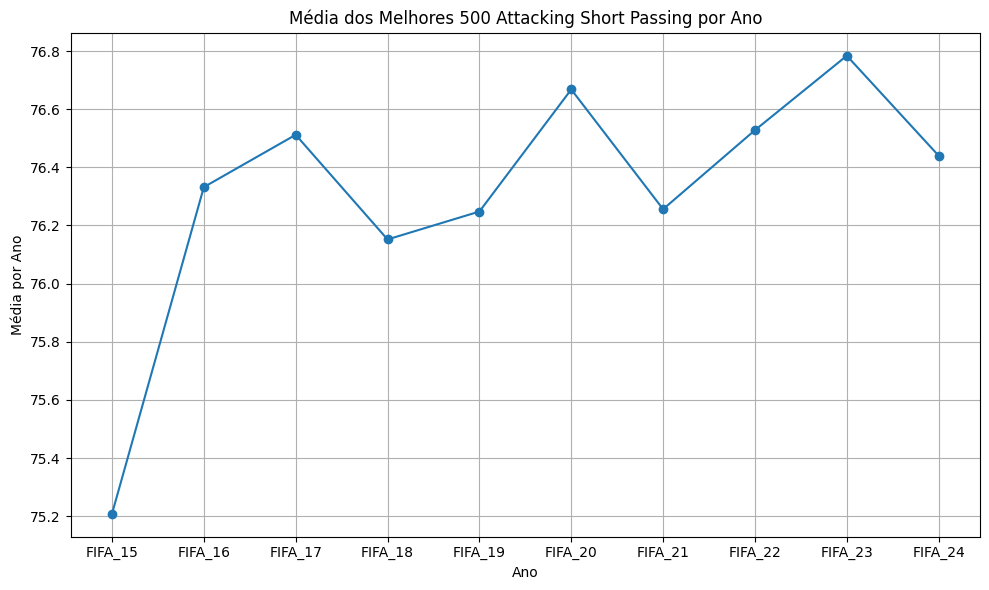

In [28]:
fun.PlotLineGraph(passe_meias_df,"Attacking Short Passing")

É observável que a posição de meia é muito sólida, por isso a pouca mudança de média. Isso se deve ao fato da posição estar no meio de campo, ou seja uma perda de posse de bola representa uma forte indicação de contra-ataque e possível gol do time adversário. 

#### 4.4.5. Pontas Direita

In [29]:
drible_pontasD_df = fun.ComparePlayers("RW", attack_players, "dribbling")


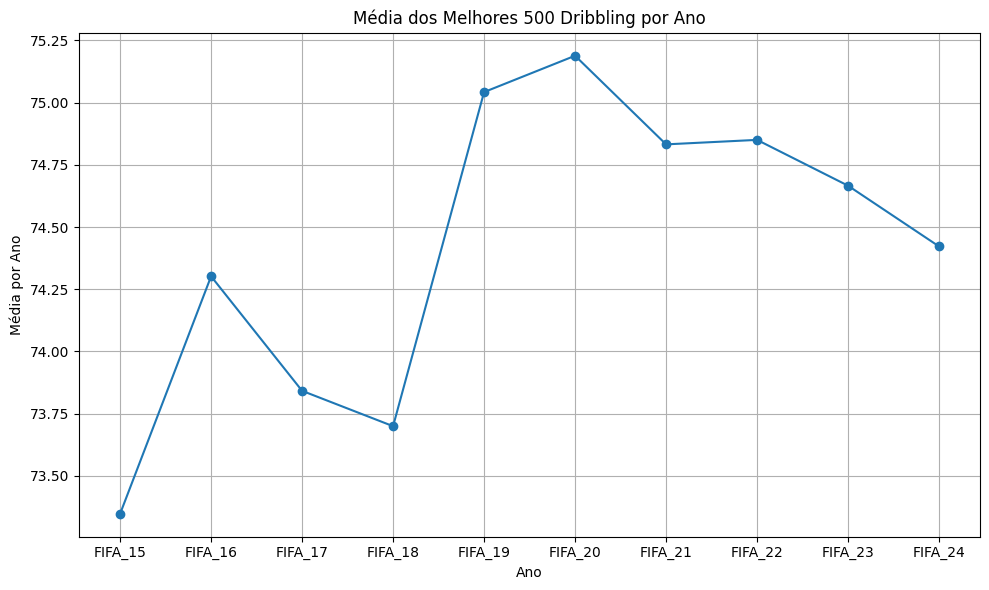

In [30]:
fun.PlotLineGraph(drible_pontasD_df, "Dribbling")

O drible é uma característica comum entre os pontas, por isso não há alterações significativas na característica.

#### 4.4.6. Laterais Direito

In [31]:
pace_lateraisD_df = fun.ComparePlayers("RB", defense_players, "movement_sprint_speed")

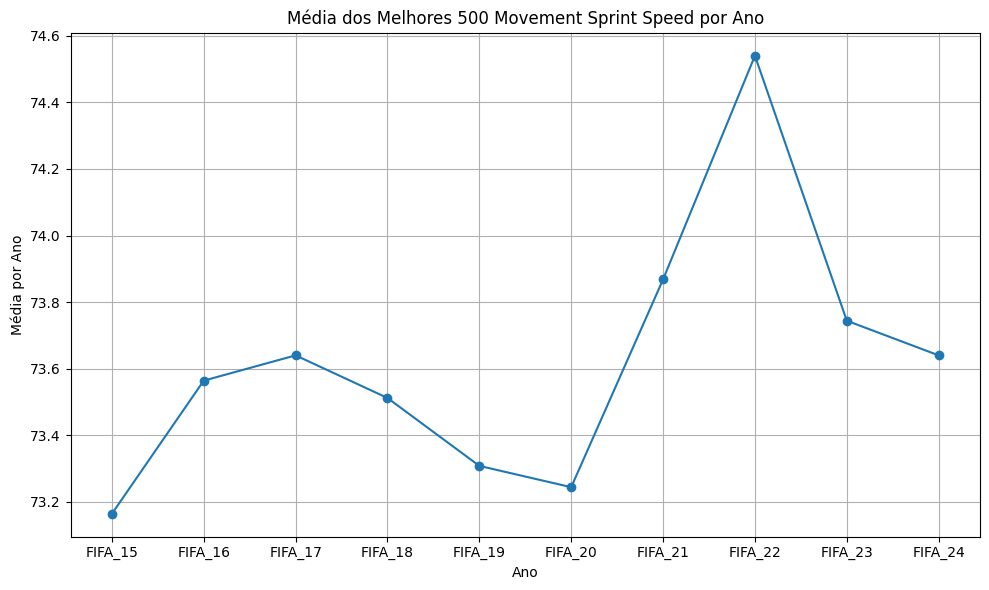

In [32]:
fun.PlotLineGraph(pace_lateraisD_df, "Movement Sprint Speed")

Novamente, podemos observar um posição concisa, a varição é uma das menores, pois o lateral necessita da velocidade em campo, já que ele é a posição que mais percorre o campo.

**Conclusão**

Podemos ver que as médias das características em geral são sólidas. E, concordando com a introdução podemos ver que durante alguns aumentos na média as posições são mais requisitadas em campo. 

### 4.5 Qual é o comportamento das posições antagônicas ?

Como as características específicas dos jogadores como, por exemplo, goleiros e atacantes, que “teoricamente” são funções opostas dentro do campo se relacionam quando comparadas.


#### 4.5.1. Centroavantes vs Goleiros

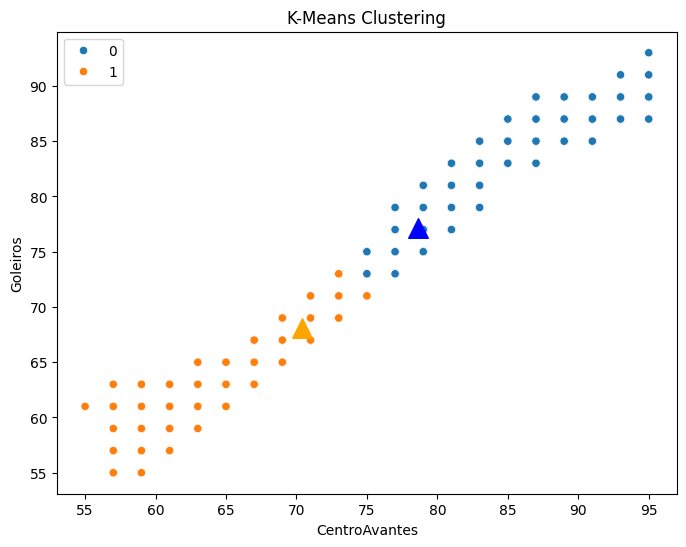

In [33]:

fun.Antagonics(attack_finishing_df,goal_reflexes_df, "CentroAvantes", "Goleiros")


Olhando para esse agrupamento, onde comparamos o reflexo dos goleiros com a finalização dos atacantes, concluímos  que baseado nos dados os atacantes levam vantagem sobre os goleiros. Observando que os atributos dos atacantes possui atributos com valores maiores.

**Observação:**Pode acontecer de existirem goleiros com mais de 75 de reflexo, pois como não são a maioria o kmeans colocou no grupo que eles possuim mais similaridade, a recíproca é verdadeira.

#### 4.5.2. Zagueiros vs Meias

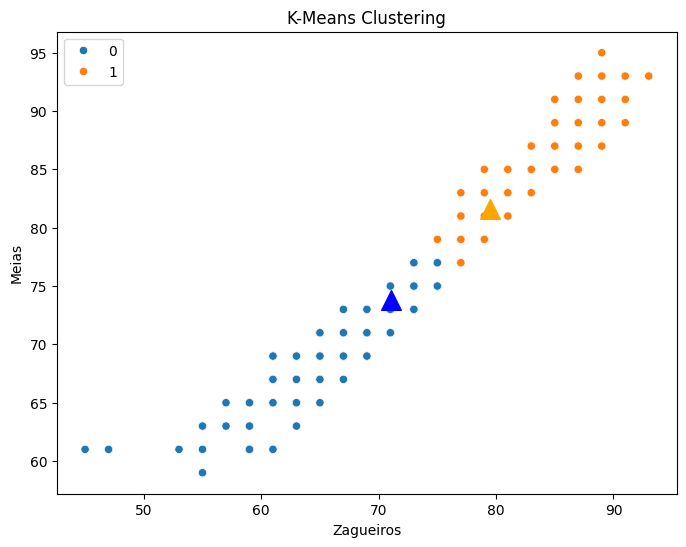

In [34]:
fun.Antagonics(nocao_defensiva_df,passe_meias_df, "Zagueiros", "Meias")

Observamos que os meias possuem vantagem pois, o valor de seu atributo de passe é maior que a noção defensiva dos zagueiros. 

#### 4.5.3. Pontas vs Laterais

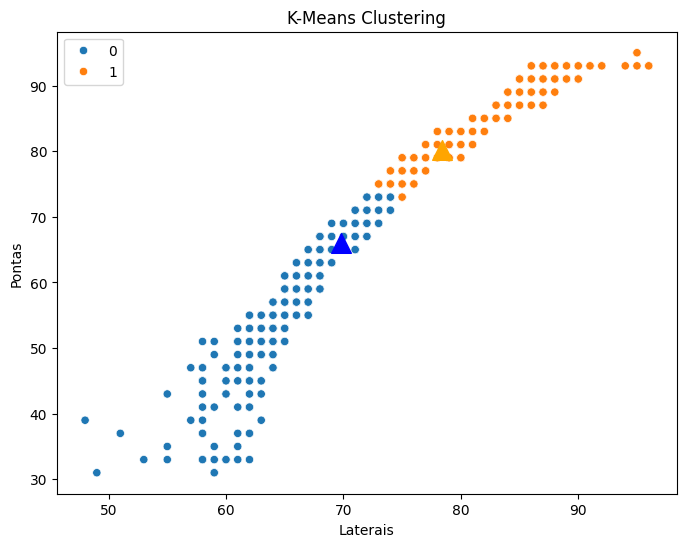

In [35]:
#Por uma questão de erro optei por transformar nessa etapa o dataset de pontas apenas para int
drible_pontasD_df = drible_pontasD_df.astype(int)

fun.Antagonics(drible_pontasD_df,pace_lateraisD_df,"Laterais","Pontas")

Pelo gráfico podemos ver que os pontas levam vantagem sobre os laterais no quesito velocidade, lembrando que a comparação é do mesmo atributo.

Trazendo para o contexto real, por característica os pontas são jogadores de muita velocidade. Já os laterais, possuem mais estilos de jogo, o que faz que não necessariamente eles tenham que possuir uma velocidade muito alta.